In [1]:
import numpy as np
import matplotlib.pyplot as plt

from network import Network
from activations import ReLU, Sigmoid
from losses import MSE
from regularizers import L2
from metrics import Accuracy
from utils import read_monk, Range_random

In [2]:
def show_plots(statistics, fname):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(statistics['tr_losses'], label='Training Loss')
    plt.plot(statistics['val_losses'], label='Test Loss', linestyle='--')
    plt.ylabel('Loss')
    plt.xlabel('# Epochs')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(statistics['tr_metrics'], label='Training Accuracy')
    plt.plot(statistics['val_metrics'], label='Test Accuracy', linestyle='--')
    plt.ylabel('Accuracy (\%)')
    plt.xlabel('# Epochs')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(fname=f'../plots/{fname}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Testing Monk's Problems

## Monk 1

In [3]:
X_train, X_test, y_train, y_test = read_monk(train_path='../data/monk/monks-1.train', test_path='../data/monk/monks-1.test')

In [4]:
np.random.seed(6)
net = Network(MSE(1), eta=1e-1)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=4,
    starting=Range_random(),
    activation=ReLU()
)

net.add_layer(
    input_size=4,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid()
)

In [5]:
statistics = net.train(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=200,
    metric=Accuracy()
)

Epochs: 100%|██████████| 200/200 [00:02<00:00, 70.10it/s]


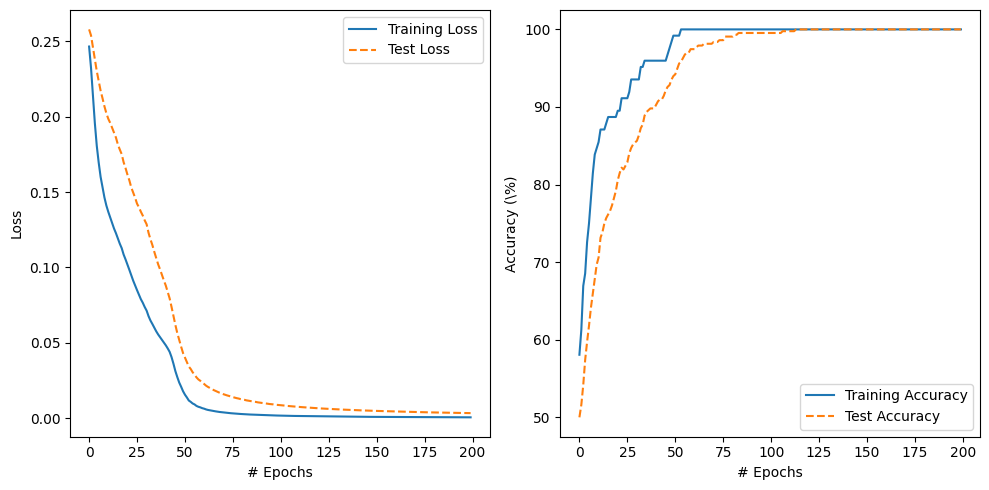

In [6]:
show_plots(statistics, 'monk1')

In [7]:
tr_stats = net.statistics(X_train, y_train, Accuracy())
print(f'Loss on training set: {tr_stats[0]}\nAccuracy on training set: {tr_stats[1]}')
ts_stats = net.statistics(X_test, y_test, Accuracy())
print(f'Loss on test set: {ts_stats[0]}\nAccuracy on test set: {ts_stats[1]}')

Loss on training set: 0.000521934897502358
Accuracy on training set: 100.0
Loss on test set: 0.003330058052702164
Accuracy on test set: 100.0


## Monk 2

In [8]:
X_train, X_test, y_train, y_test = read_monk(train_path='../data/monk/monks-2.train', test_path='../data/monk/monks-2.test')

In [9]:
np.random.seed(6)
net = Network(MSE(1), eta=1e-1)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=4,
    starting=Range_random(),
    activation=ReLU(),
)

net.add_layer(
    input_size=4,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid(),
)

In [10]:
statistics = net.train(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=200,
    metric=Accuracy()
)

Epochs: 100%|██████████| 200/200 [00:03<00:00, 58.32it/s]


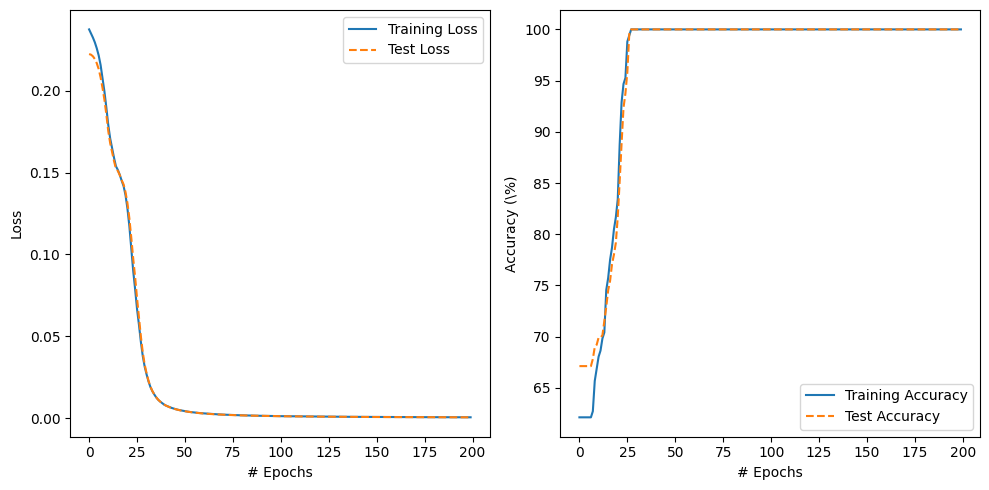

In [11]:
show_plots(statistics, 'monk2')

In [12]:
tr_stats = net.statistics(X_train, y_train, Accuracy())
print(f'Loss on training set: {tr_stats[0]}\nAccuracy on training set: {tr_stats[1]}')
ts_stats = net.statistics(X_test, y_test, Accuracy())
print(f'Loss on test set: {ts_stats[0]}\nAccuracy on test set: {ts_stats[1]}')

Loss on training set: 0.00046709219046658137
Accuracy on training set: 100.0
Loss on test set: 0.0004470826357928973
Accuracy on test set: 100.0


## Monk 3 without Regularization

In [13]:
X_train, X_test, y_train, y_test = read_monk(train_path='../data/monk/monks-3.train', test_path='../data/monk/monks-3.test')

In [14]:
np.random.seed(6)
net = Network(MSE(1), eta=1e-1)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=4,
    starting=Range_random(),
    activation=ReLU()
)

net.add_layer(
    input_size=4,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid()
)

In [15]:
statistics = net.train(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=200,
    metric=Accuracy()
)

Epochs: 100%|██████████| 200/200 [00:02<00:00, 70.45it/s]


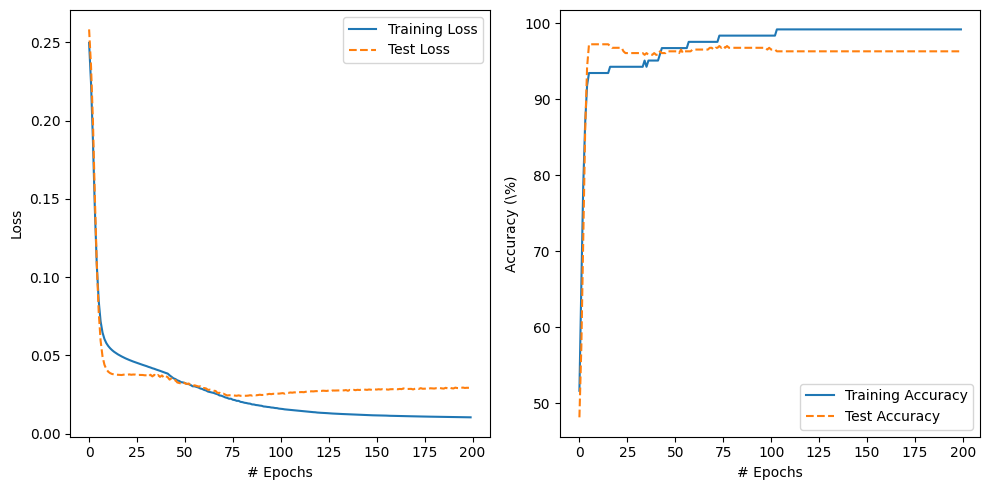

In [16]:
show_plots(statistics, 'monk3_noreg')

In [17]:
tr_stats = net.statistics(X_train, y_train, Accuracy())
print(f'Loss on training set: {tr_stats[0]}\nAccuracy on training set: {tr_stats[1]}')
ts_stats = net.statistics(X_test, y_test, Accuracy())
print(f'Loss on test set: {ts_stats[0]}\nAccuracy on test set: {ts_stats[1]}')

Loss on training set: 0.019760417761135983
Accuracy on training set: 98.36065573770492
Loss on test set: 0.024111847048483067
Accuracy on test set: 96.75925925925925


## Monk 3 with Regularization

In [18]:
np.random.seed(6)
net = Network(MSE(1), eta=1e-1)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=4,
    starting=Range_random(),
    activation=ReLU(),
    regularizer=L2(1e-4)
)

net.add_layer(
    input_size=4,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid(),
    regularizer=L2(1e-4)
)

In [19]:
statistics = net.train(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=500,
    patience=20,
    metric=Accuracy()
)

Epochs:  26%|██▋       | 132/500 [00:01<00:05, 67.92it/s]


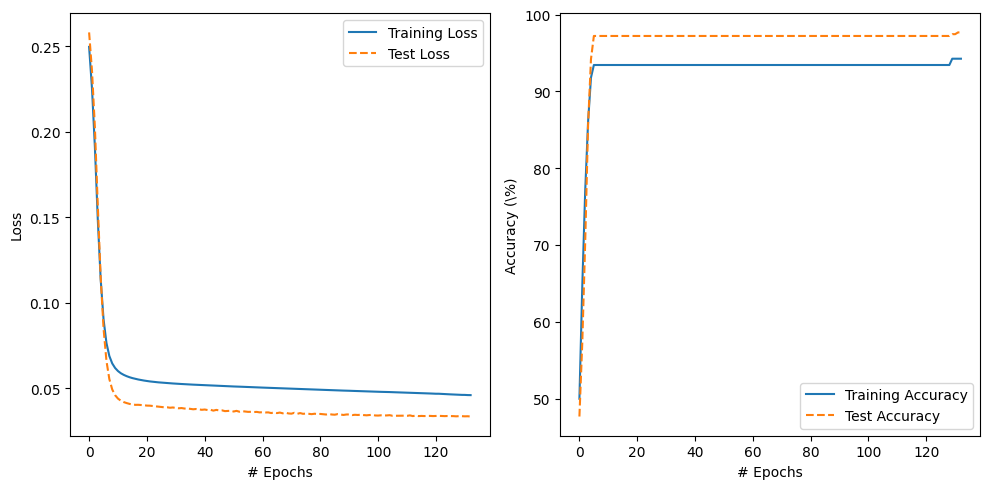

In [20]:
show_plots(statistics, 'monk3_reg')

In [21]:
tr_stats = net.statistics(X_train, y_train, Accuracy())
print(f'Loss on training set: {tr_stats[0]}\nAccuracy on training set: {tr_stats[1]}')
ts_stats = net.statistics(X_test, y_test, Accuracy())
print(f'Loss on test set: {ts_stats[0]}\nAccuracy on test set: {ts_stats[1]}')

Loss on training set: 0.04741971299411543
Accuracy on training set: 93.44262295081968
Loss on test set: 0.03381149109336232
Accuracy on test set: 97.22222222222221
